## STA141B Final Project Writeup
### Group Members:
Sophia Tierney, Niraj Bangari, Marvin Pepito, Cody Briggs, Alyanur Al Azani

**Note**: Cody and Alyanur didn't contribute to this project

In [91]:
import pandas as pd
import sqlalchemy as sqla
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [7]:
sqlite_file = 'data/complete_covid_data.sqlite'
covid_conn = sqla.create_engine('sqlite:///' + sqlite_file)

In [73]:
with covid_conn.connect() as con:
    query_ = con.execute("ALTER TABLE covid RENAME COLUMN '1st_dose', '2nd_dose' 'pop_2019' TO first_dose, sec_dose, pop")

In [250]:
sql_query = """
select date, total_doses_state_level, cum_deaths, confirmed, first_dose from covid
where state='California'
"""
df_ca = pd.read_sql_query(sql_query, covid_conn)

In [251]:
df_ca.head()

,date,total_doses_state_level,cum_deaths,confirmed,first_dose
0,2021-01-03,436154.0,26515.0,2515183.0,0.0
1,2021-01-04,454306.0,26783.0,2552299.0,0.0
2,2021-01-05,459564.0,27196.0,2587629.0,0.0
3,2021-01-06,488515.0,27769.0,2626861.0,0.0
4,2021-01-07,586379.0,28312.0,2678592.0,0.0


[]

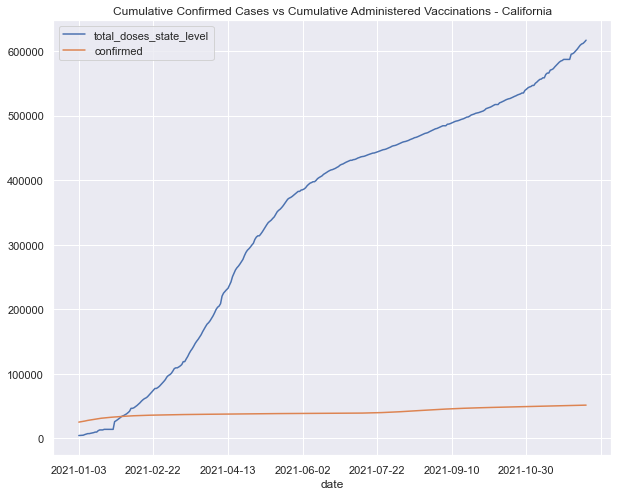

In [271]:
df_ca_cases = df_ca[['date', 'total_doses_state_level', 'confirmed']]
df_ca_cases['total_doses_state_level'] = df_ca_cases['total_doses_state_level']/100
df_ca_cases['confirmed'] = df_ca_cases['confirmed']/100
df_ca_cases = df_ca_cases.set_index('date')
ax = df_ca_cases[['total_doses_state_level', 'confirmed']].plot()
ax.set_title("Cumulative Confirmed Cases vs Cumulative Administered Vaccinations - California")
ax.plot()

[]

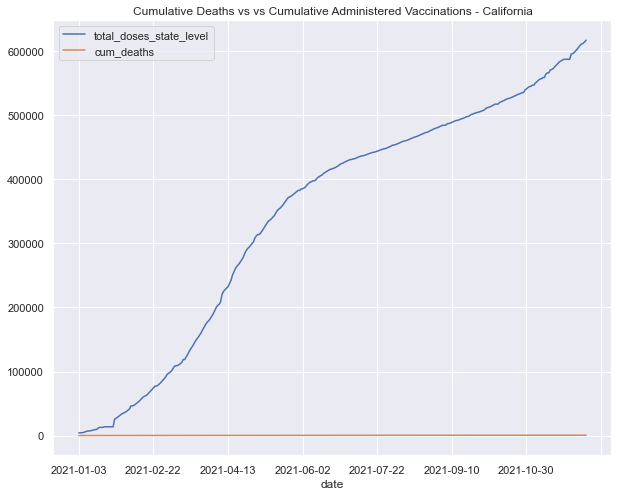

In [270]:
df_ca_deaths = df_ca[['date', 'total_doses_state_level', 'cum_deaths']]
df_ca_deaths['total_doses_state_level'] = df_ca_deaths['total_doses_state_level']/100
df_ca_deaths['cum_deaths'] = df_ca_deaths['cum_deaths']/100
df_ca_deaths = df_ca_deaths.set_index('date')
ax = df_ca_deaths[['total_doses_state_level', 'cum_deaths']].plot()
ax.set_title("Cumulative Deaths vs vs Cumulative Administered Vaccinations - California")
ax.plot()

The California plot dates range from January 3, 2021 to December 9, 2021. Total vaccine doses accounts for both first dose and second dose. We expected to see the cumulative confirmed cases steady decrease, however it appears to be leveling out despite the vaccinated population increasing. Although subtle, we can see that the confirmed cases near the beginning of 2021 increases slightly, which we can conclude was due to the sharp peak in cases and deaths during Winter of 2020. We also see a small spike in cases around September 10, 2021, which we presume is due to the Delta variant being introduced to the population (as of May 2021). From end of October 2021 to date, the confirmed cases appear to be subtly increasing which we contribute to the newest Omicron variant (evolving since November 2021). We see a similar trend with confirmed cases, deaths, and vaccinations in Idaho as we do in California, however in Idaho, the total vaccination doses is much smaller and cases are much higher than California, relative to the states' populations.

In [254]:
sql_query = """
select date, total_doses_state_level, cum_deaths, confirmed, first_dose from covid
where state='Idaho'
"""
df_id = pd.read_sql_query(sql_query, covid_conn)

In [255]:
df_id.head()

,date,total_doses_state_level,cum_deaths,confirmed,first_dose
0,2020-12-17,321.0,1259.0,126878.0,321.0
1,2020-12-18,944.0,1275.0,128218.0,944.0
2,2020-12-19,2306.0,1275.0,129069.0,2306.0
3,2020-12-20,3582.0,1280.0,129960.0,3582.0
4,2020-12-21,4348.0,1301.0,130877.0,4348.0


[]

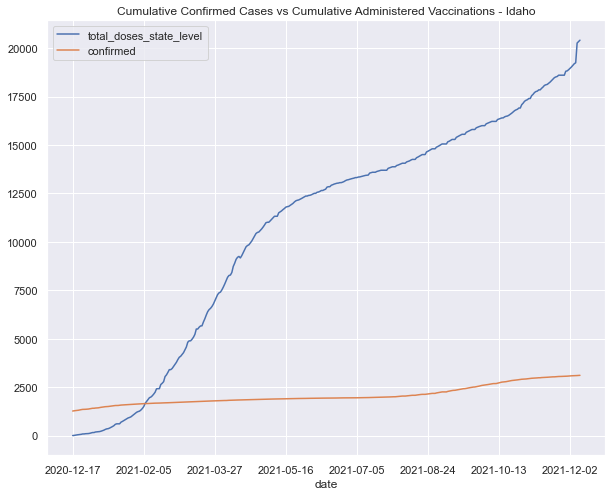

In [272]:
df_id_cases = df_id[['date', 'total_doses_state_level', 'confirmed']]
df_id_cases['total_doses_state_level'] = df_id_cases['total_doses_state_level']/100
df_id_cases['confirmed'] = df_id_cases['confirmed']/100
df_id_cases = df_id_cases.set_index('date')
ax = df_id_cases[['total_doses_state_level', 'confirmed']].plot()
ax.set_title("Cumulative Confirmed Cases vs Cumulative Administered Vaccinations - Idaho")
ax.plot()

[]

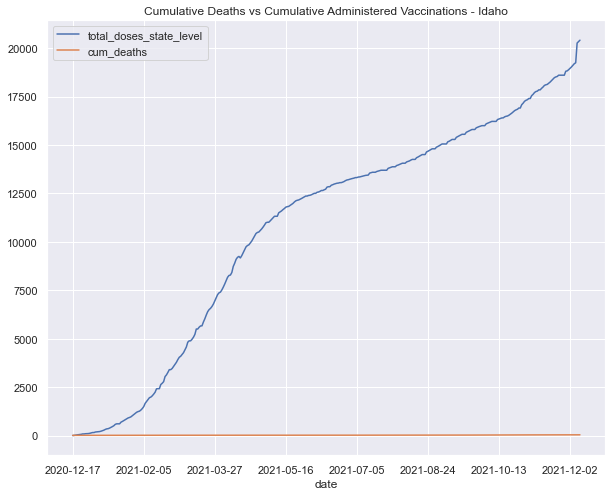

In [273]:
df_id_deaths = df_id[['date', 'total_doses_state_level', 'cum_deaths']]
df_id_deaths['total_doses_state_level'] = df_id_deaths['total_doses_state_level']/100
df_id_deaths['cum_deaths'] = df_id_deaths['cum_deaths']/100
df_id_deaths = df_id_deaths.set_index('date')
ax = df_id_deaths[['total_doses_state_level', 'cum_deaths']].plot()
ax.set_title("Cumulative Deaths vs Cumulative Administered Vaccinations - Idaho")
ax.plot()

In [224]:
sql_query = """
select date, total_doses_state_level from covid
where state='California' 
"""
my_data_post_ca = pd.read_sql_query(sql_query, covid_conn)

In [225]:
my_data_post_ca['date'] = pd.to_datetime(my_data_post_ca['date'])
my_data_post_ca['date'] = my_data_post_ca['date'].dt.strftime('%m-%d')
my_data_post_ca['date']

0      01-03
1      01-04
2      01-05
3      01-06
4      01-07
       ...  
336    12-05
337    12-06
338    12-07
339    12-08
340    12-09
Name: date, Length: 341, dtype: object

[]

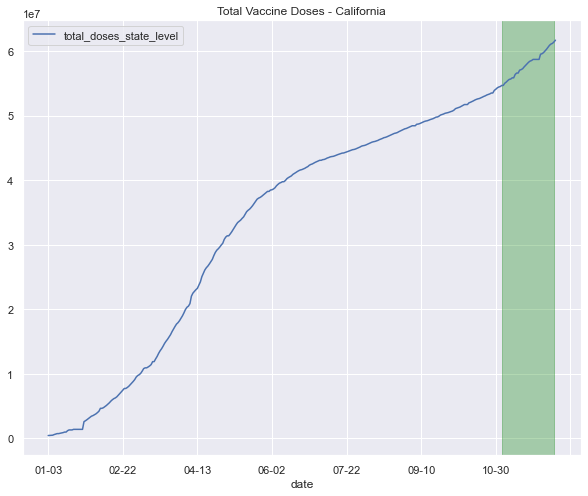

In [226]:
ax = my_data_post_ca.plot(x = 'date', y = 'total_doses_state_level') #california trend
ax.axvspan(304, 339, label = 'Post Vaccine Mandate Announcement', color = "green", alpha = 0.3)
ax.set_title("Total Vaccine Doses - California")
ax.plot()

[]

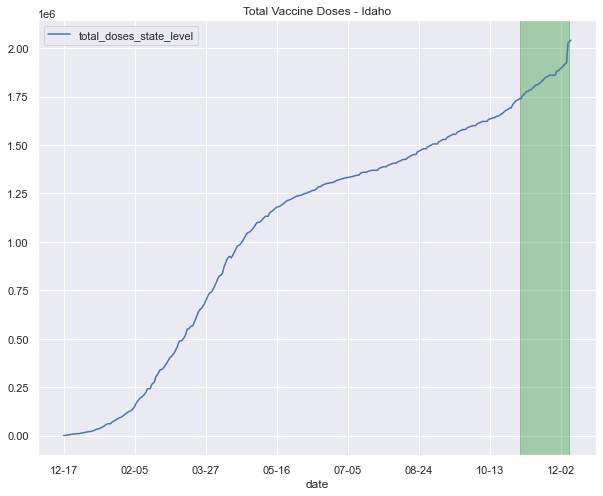

In [227]:
my_data_post_id=pd.read_sql_query("SELECT date, total_doses_state_level FROM covid WHERE state='Idaho'", covid_conn)
my_data_post_id['date'] = pd.to_datetime(my_data_post_id['date'])
my_data_post_id['date'] = my_data_post_id['date'].dt.strftime('%m-%d')
my_data_post_id['date']
#clear spike after mandates enforced
ax=my_data_post_id.plot(x='date', y='total_doses_state_level') #Idaho trend
ax.axvspan(321,356,label="Post Vaccine Mandate Announcement",color="green", alpha=0.3)
ax.set_title("Total Vaccine Doses - Idaho")
ax.plot()

In [228]:
print("Vaccinations/day Post Mandate (Idaho): " + str((my_data_post_id['total_doses_state_level'][356])-(my_data_post_id['total_doses_state_level'][321])/(356-321)))
print("Vaccinations/day Post Mandate (Idaho): " + str((my_data_post_id['total_doses_state_level'][320]-my_data_post_id['total_doses_state_level'][1])/(320-1)))
val1=(my_data_post_id['total_doses_state_level'][356]-my_data_post_id['total_doses_state_level'][321])/(356-321)
val2=(my_data_post_id['total_doses_state_level'][320]-my_data_post_id['total_doses_state_level'][1])/(320-1)
perc_inc_id = (val1-val2)/ val2 *100
print("Percent Increase after Mandate(Idaho): " + str(perc_inc_id))
print("Vaccinations/day Post Mandate (California): " + str((my_data_post_ca['total_doses_state_level'][339]-my_data_post_ca['total_doses_state_level'][304])/(339-304)))
print("Vaccinations/day Post Mandate (California): " + str((my_data_post_ca['total_doses_state_level'][303]-my_data_post_ca['total_doses_state_level'][0])/(303)))
val3=(my_data_post_ca['total_doses_state_level'][339]-my_data_post_ca['total_doses_state_level'][304])/(339-304)
val4=(my_data_post_ca['total_doses_state_level'][303]-my_data_post_ca['total_doses_state_level'][0])/(303)
perc_inc_id2 = (val3-val4)/ val4 *100
print("Percent Increase after Mandate(California): " + str(perc_inc_id2))

Vaccinations/day Post Mandate (Idaho): 1984132.6
Vaccinations/day Post Mandate (Idaho): 5433.288401253919
Percent Increase after Mandate(Idaho): 54.359032858183845
Vaccinations/day Post Mandate (California): 192594.25714285715
Vaccinations/day Post Mandate (California): 178466.08580858086
Percent Increase after Mandate(California): 7.916446012846324


We chose to compare the vaccination count trends between California and Idaho, as we wanted to compare our home state with the state with the current lowest percentage of vaccinated adults. Looking at the two plots, which have the date as the $x$ axis and the total administered doses as the $y$ axis, it is clear that while California has significantly more doses, there is a much bigger spike in the green highlighted section, which represents the date of the announcement of the vaccine mandate. This observation is echoed by the calculation for the percent increase of daily doses after the mandate, with Idaho having an increase of $54\%$ and California having an increase of $7\%$.

<AxesSubplot:title={'center':'California Vaccination Rate'}, xlabel='date'>

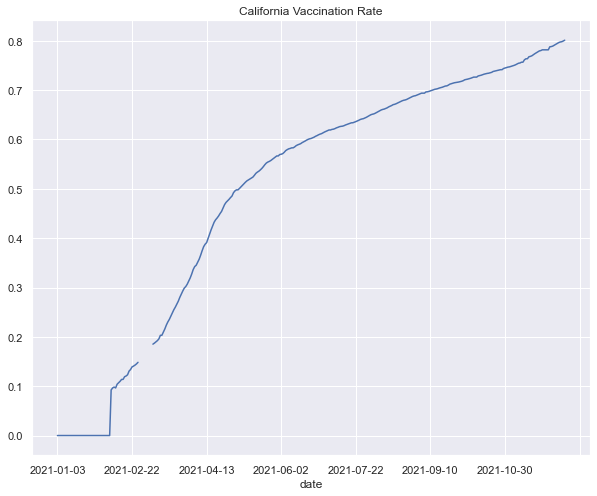

In [229]:
# sql_query = """
# select date, 'pop_2019', total_doses_state_level, '1st_dose', '2nd_dose' from covid
# """
pv6 = pd.read_sql_query('select date, state, pop, total_doses_state_level, first_dose, sec_dose from covid', covid_conn)
vax_rate = pv6['first_dose'] / pv6['pop']
pv6['vaccination_rate'] = vax_rate

# california timeseries plot of vaccination rate (1st dose / total population)
pv7 = pv6[pv6['state'] == 'California']
pv7.set_index('date', inplace = True)
pv7.head()
pv7['vaccination_rate'].plot(title ='California Vaccination Rate')

<AxesSubplot:title={'center':'Idaho Vaccination Rate'}, xlabel='date'>

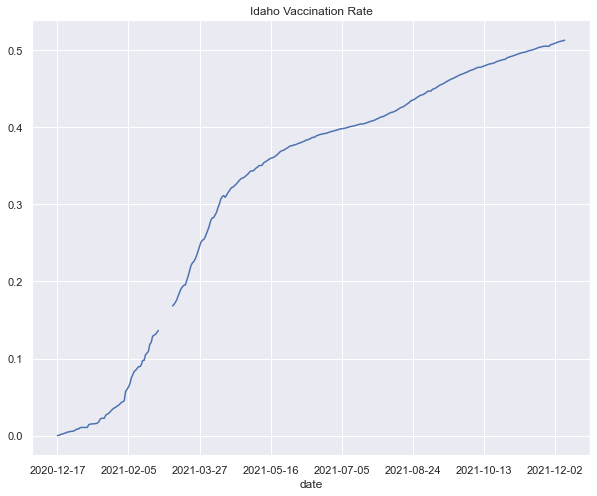

In [230]:
# idaho timeseries plot of vaccination rate (1st dose / total population)
pv8 = pv6[pv6['state'] == 'Idaho']
pv8.set_index('date', inplace=True)
pv8['vaccination_rate'].plot(title='Idaho Vaccination Rate')

The ```vaccination rate``` column for our purposes in this graph is equal to:

```the number of people who have received at least one dose``` / ```the state population at that time```

Note: this state population is the total population and thus includes young children who have not been eligible for the vaccine for most of $2021$. 

In [233]:
# add shifted vax rate data for the last 5 days to use for forecasting
pv7['vaxrate_1dayback'] = pv7['vaccination_rate'].shift(+1)
pv7['vaxrate_2daysback'] = pv7['vaccination_rate'].shift(+2)
pv7['vaxrate_3daysback'] = pv7['vaccination_rate'].shift(+3)
pv7['vaxrate_4daysback'] = pv7['vaccination_rate'].shift(+4)
pv7['vaxrate_5daysback'] = pv7['vaccination_rate'].shift(+5)
pv7

,state,pop,total_doses_state_level,first_dose,sec_dose,vaccination_rate,vaxrate_1dayback,vaxrate_2daysback,vaxrate_3daysback,vaxrate_4daysback,vaxrate_5daysback
date,,,,,,,,,,,
2021-01-08,California,39512223.0,652128.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN
2021-01-09,California,39512223.0,734405.0,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN
2021-01-10,California,39512223.0,734405.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN
2021-01-11,California,39512223.0,783476.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2021-01-12,California,39512223.0,816673.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-05,California,39512223.0,60900969.0,31467380.0,23616962.0,0.796396,0.794568,0.792727,0.791039,0.789278,0.788301
2021-12-06,California,39512223.0,61099523.0,31512403.0,23675841.0,0.797536,0.796396,0.794568,0.792727,0.791039,0.789278
2021-12-07,California,39512223.0,61199872.0,31537003.0,23703533.0,0.798158,0.797536,0.796396,0.794568,0.792727,0.791039


In [234]:
pv7 = pv7.dropna()
pv7.head()

,state,pop,total_doses_state_level,first_dose,sec_dose,vaccination_rate,vaxrate_1dayback,vaxrate_2daysback,vaxrate_3daysback,vaxrate_4daysback,vaxrate_5daysback
date,,,,,,,,,,,
2021-01-13,California,39512223.0,889042.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-14,California,39512223.0,971829.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-15,California,39512223.0,971829.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-16,California,39512223.0,1188703.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-01-17,California,39512223.0,1303518.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [235]:
x1,x2,x3,x4,x5,y = (pv7['vaxrate_1dayback'],pv7['vaxrate_2daysback'],pv7['vaxrate_3daysback'],
pv7['vaxrate_4daysback'],pv7['vaxrate_5daysback'],pv7['vaccination_rate'])
x1,x2,x3,x4,x5,y = np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(y)
x1,x2,x3,x4,x5,y = x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),y.reshape(-1,1)
final_x = np.concatenate((x1,x2,x3,x4,x5),axis=1)
print(final_x)

[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 ...
 [0.79753556 0.79639609 0.7945681  0.79272652 0.79103894]
 [0.79815815 0.79753556 0.79639609 0.7945681  0.79272652]
 [0.7995435  0.79815815 0.79753556 0.79639609 0.7945681 ]]


In [236]:
lin_model = LinearRegression()
ca_train, ca_test, y_ca_train, y_ca_test = train_test_split(final_x,y,test_size=0.2, shuffle=False)
lin_model.fit(ca_train,y_ca_train)

LinearRegression()

**California Vaccination Rate**

Comparing the predicted vaccination rates from our linear regression model to the actual observed vaccination rates for our test data set. Our linear regression model uses the previous five days' vaccination rates to predict the vaccination rate of any particular day. We can see that this predicted model follows the true vaccination rates very well. 

Now we can use this regression model to forecast future vaccination rates in California. 

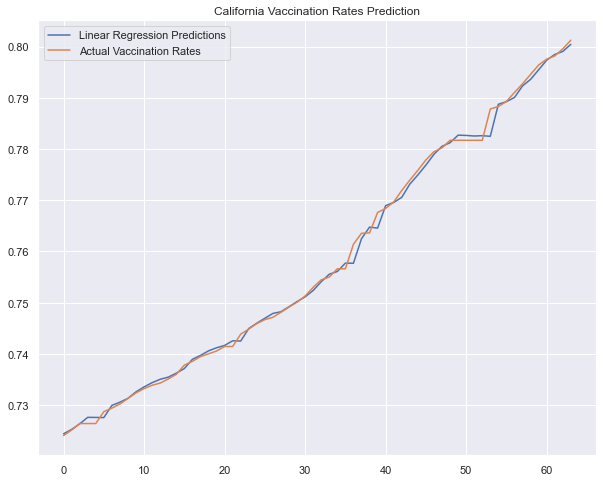

In [237]:
ca_pred = lin_model.predict(ca_test)
plt.plot(ca_pred, label='Linear Regression Predictions')
plt.plot(y_ca_test, label='Actual Vaccination Rates')
plt.legend(loc='upper left')
plt.title("California Vaccination Rates Prediction")
plt.show()

In [238]:
# idaho time series predictive model - regression setup 

# add shifted vax rate data for the last 5 days to use for forecasting
pv8['vaxrate_1dayback'] = pv8['vaccination_rate'].shift(+1)
pv8['vaxrate_2daysback'] = pv8['vaccination_rate'].shift(+2)
pv8['vaxrate_3daysback'] = pv8['vaccination_rate'].shift(+3)
pv8['vaxrate_4daysback'] = pv8['vaccination_rate'].shift(+4)
pv8['vaxrate_5daysback'] = pv8['vaccination_rate'].shift(+5)
pv8 = pv8.dropna()

model2 = LinearRegression()

w1,w1,w3,w4,w5,z = (pv8['vaxrate_1dayback'],pv8['vaxrate_2daysback'],pv8['vaxrate_3daysback'],
pv8['vaxrate_4daysback'],pv8['vaxrate_5daysback'],pv8['vaccination_rate'])
w1,w2,w3,w4,w5,z = np.array(w1),np.array(w1),np.array(w3),np.array(w4),np.array(w5),np.array(z)
w1,w2,w3,w4,w5,z = w1.reshape(-1,1),w2.reshape(-1,1),w3.reshape(-1,1),w4.reshape(-1,1),w5.reshape(-1,1),z.reshape(-1,1)
final_w = np.concatenate((w1,w2,w3,w4,w5),axis=1)
print(final_w)

[[2.00440387e-03 2.00440387e-03 1.29038395e-03 5.28240439e-04
  1.79624132e-04]
 [2.43303965e-03 2.43303965e-03 2.00440387e-03 1.29038395e-03
  5.28240439e-04]
 [3.17000221e-03 3.17000221e-03 2.43303965e-03 2.00440387e-03
  1.29038395e-03]
 ...
 [5.10867820e-01 5.10867820e-01 5.10185136e-01 5.09412360e-01
  5.08680994e-01]
 [5.11273513e-01 5.11273513e-01 5.10867820e-01 5.10185136e-01
  5.09412360e-01]
 [5.11615974e-01 5.11615974e-01 5.11273513e-01 5.10867820e-01
  5.10185136e-01]]


In [239]:
id_train, id_test, y_id_train, y_id_test = train_test_split(final_w,z,test_size=0.2, shuffle=False)
model2.fit(id_train,y_id_train)

LinearRegression()

**Idaho Vaccination Rates**

We also use a linear regression based on the vaccination rate of the last 5 days to predict the vaccination rate of a given day. When testing our predictions against our Idaho test set, we see once again that our linear model follows the true values very well. Now we can use this model for our forecasting.

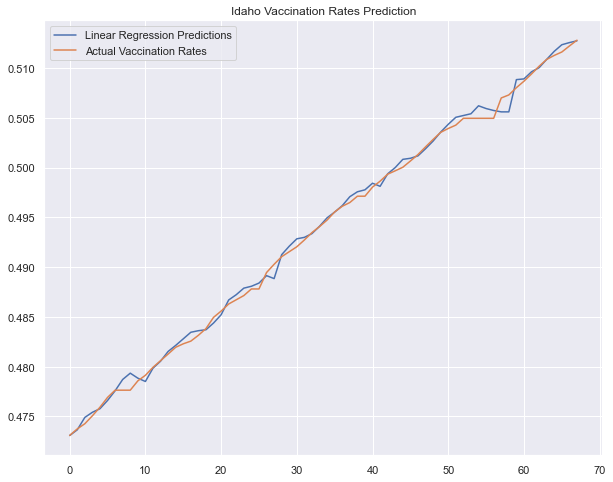

In [240]:
id_pred = model2.predict(id_test)
plt.plot(id_pred, label='Linear Regression Predictions')
plt.plot(y_id_test, label='Actual Vaccination Rates')
plt.legend(loc='upper left')
plt.title("Idaho Vaccination Rates Prediction")
plt.show()

**California Vaccination Rate 30 Day Forecast**

Using linear regression of our data set allows us to predict the future vaccination rate of california in 30 days since our last observation, that is, 12-09-2021. By using this simple linear regression only considering the trend in vaccination rates within the state over time, we obtain a very high prediction value of 0.983, which may be inaccurate due to the nature of the regression, and since the trend of 2nd doses and booster shots are not included in the model. 

In [ ]:
# ordinal date of 30 days beyond the last date of the dataset
future_dates = np.array([738163])
future_dates = future_dates.reshape(1,-1)

In [ ]:
ca_ord_dates = pv7.reset_index()['date'].map(dt.datetime.toordinal)
X_ca = np.array(ca_ord_dates).reshape(-1,1)

linear_fit = model_ca.fit(X_ca,y_ca)
newca_pred = model_ca.predict(future_dates)
newca_pred

model prediction: $0.983\%$